<a href="https://colab.research.google.com/github/akrina-mr/Thesis_Tropical_Cyclone_Tracks_Southeastern_Basins/blob/main/Tropical_Cyclone_Tracks_Pacific.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Libraries used in the HURDAT-2 management
"""
import pandas as pd
from datetime import datetime

In [2]:
def lat_lon_to_float(v):
  """
  Convert strings from NHC to float locations.
  """

  if (v[-1] == 'S') or (v[-1] == 'W'):
    multiplier = -1
  else:
    multiplier = 1
  return float(v[:-1]) * multiplier

In [3]:
data = []

"""
Formatting the data
"""

with open('hurdat2PA_ZONA.txt', 'r') as f:
  for line in f.readlines():
      if line.startswith('EP'):
        storm_id = line.split(',')
        storm_number = storm_id[0].strip()
        storm_name = storm_id[1].strip()
      else:
        location_line = line.split(',')
        dt = datetime.strptime(location_line[0] + location_line[1], '%Y%m%d %H%M')
        fecha = datetime.strptime(location_line[0], '%Y%m%d')
        HORA = dt.hour
        year = dt.year
        month = dt.month
        day = dt.day
        storm_status = location_line[3].strip()
        storm_lat= lat_lon_to_float(location_line[4].strip())
        storm_lon = lat_lon_to_float(location_line[5].strip())
        max_speed = float(location_line[6].strip())
        min_pressure = float(location_line[7].strip())
        wind_radii_34ktNE = float(location_line[8].strip())
        wind_radii_34ktSE = float(location_line[9].strip())
        wind_radii_34ktSW = float(location_line[10].strip())
        wind_radii_34ktNW = float(location_line[11].strip())
        wind_radii_50ktNE = float(location_line[12].strip())
        wind_radii_50ktSE = float(location_line[13].strip())
        wind_radii_50ktSW = float(location_line[14].strip())
        wind_radii_50ktNW = float(location_line[15].strip())
        wind_radii_64ktNE = float(location_line[16].strip())
        wind_radii_64ktSE = float(location_line[17].strip())
        wind_radii_64ktSW = float(location_line[18].strip())
        wind_radii_64ktNW = float(location_line[19].strip())


        data.append([dt, storm_number, storm_name, day, month, year, HORA, max_speed, storm_status, min_pressure, storm_lat, 
                     storm_lon, wind_radii_34ktNE,
                     wind_radii_34ktSE, wind_radii_34ktSW, wind_radii_34ktNW,
                     wind_radii_50ktNE, wind_radii_50ktSE, wind_radii_50ktSW,
                     wind_radii_50ktNW, wind_radii_64ktNE, wind_radii_64ktSE,
                     wind_radii_64ktSW, wind_radii_64ktNW])

In [4]:
"""
Making dataframe with Pandas
"""

df = pd.DataFrame(data, columns=['DT', 'Número', 'Nombre', 'Día', 'Mes', 'Año', 'Hora', 'Viento Max', 'Categoría', 'Presión Min','Lat', 
                     'Lon', 'Radio 34ktNE',
                     'Radio 34ktSE', 'Radio 34ktSW', 'Radio 34ktNW',
                     'Radio 50ktNE', 'Radio 50ktSE', 'Radio 50ktSW',
                     'Radio 50ktNW', 'Radio 64ktNE', 'Radio 64ktSE',
                     'Radio 64ktSW', 'Radio 64ktNW'])

# **Plotting Pacific Tracks**

In [5]:
"""
Map libraries 
"""

!pip install cartopy
import cartopy

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
"""
If an error in Google Colab appears, which doesn't run the environment, and a  legend
appears saying that the session has expired. In this case, rerun everything, 
removing the "#" in this section. Once everything is done, add the "#" and run 
everything again. The error will be gone.
"""

#!pip uninstall shapely

'\nIf an error in Google Colab appears, which doesn\'t run the environment, and a  legend\nappears saying that the session has expired. In this case, rerun everything, \nremoving the "#" in this section. Once everything is done, add the "#" and run \neverything again. The error will be gone.\n'

In [7]:
!pip install shapely --no-binary shapely

DEPRECATION: --no-binary currently disables reading from the cache of locally built wheels. In the future --no-binary will not influence the wheel cache. pip 23.1 will enforce this behaviour change. A possible replacement is to use the --no-cache-dir option. You can use the flag --use-feature=no-binary-enable-wheel-cache to test the upcoming behaviour. Discussion can be found at https://github.com/pypa/pip/issues/11453
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
plot_crs = ccrs.LambertConformal(central_longitude=-100., central_latitude=45)
data_crs =ccrs.PlateCarree()

Text(0.5, 1.0, 'CYCLONES THAT HAVE PASSED THROUGH THE PACIFIC AREA OF INTEREST 1970-2020')

/usr/local/lib/python3.9/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.9/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.9/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.9/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


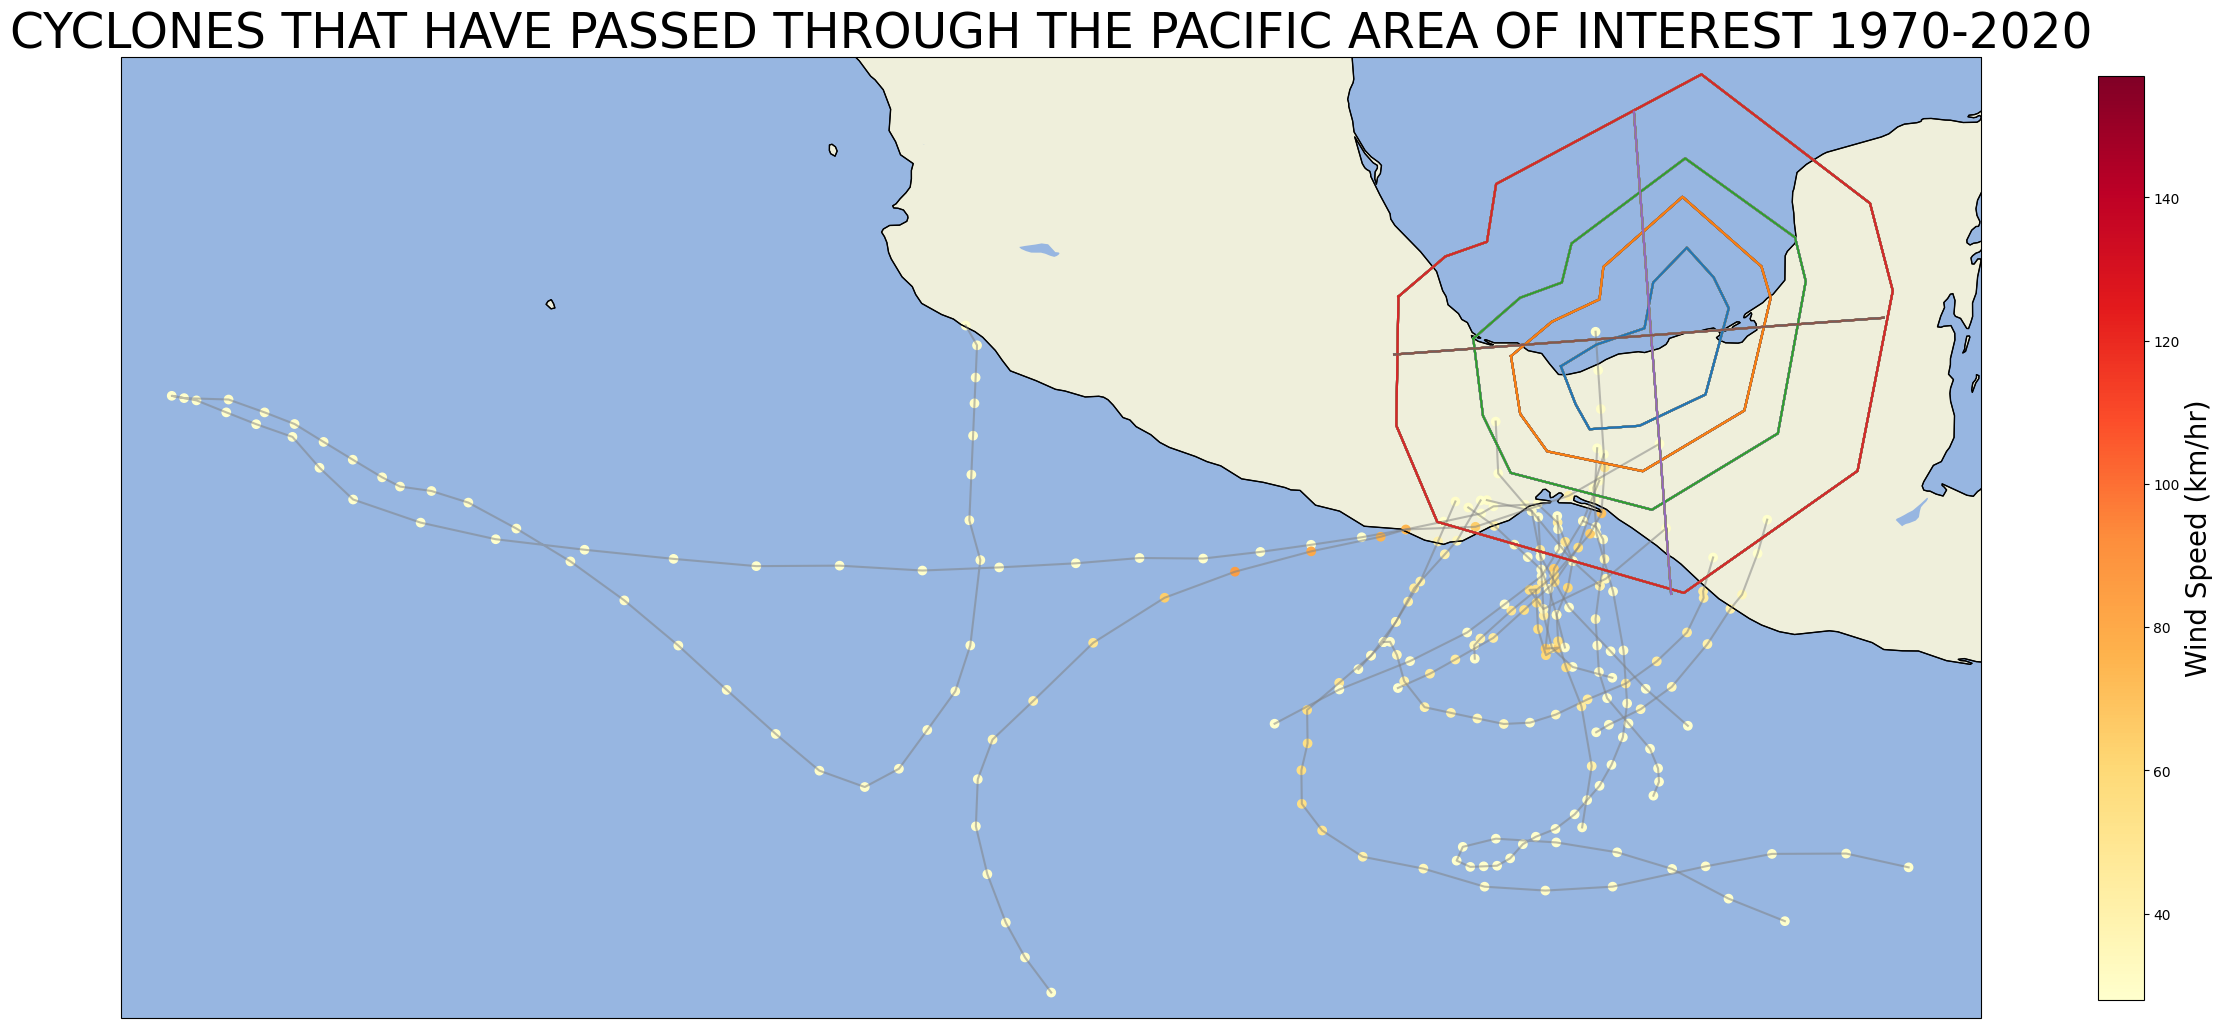

In [9]:
"""
Coordinates of the study polygons
"""

x = (-94.5, -94.3, -94.1, -93.3, -92.2, -91.7, -91.9, -92.3, -92.9, -93.1, -93.9, -94.5)
y = (18.3, 17.7, 17.3, 17.3, 17.7, 19.0, 19.5, 20.0, 19.5, 18.8, 18.6, 18.3)

x85 = (-95.3, -95.2, -94.8, -93.3, -91.6, -91.0, -91.1, -92.3, -93.7, -93.8, -94.6, -95.3)
y85 = (18.5, 17.6, 17.0, 16.6, 17.4, 19.1, 19.6, 20.8, 19.8, 19.3, 19.0, 18.5)

x150 = (-95.9, -95.8, -95.4, -93.2, -91.1, -90.4, -90.5, -92.2, -94.2, -94.4, -95.1, -95.9)
y150 = (18.8, 17.6, 16.7, 16.0, 17.0, 19.3, 20.0, 21.4, 20.2, 19.6, 19.4, 18.8)

x300 = (-97.1, -97.2, -96.6, -92.8, -89.9, -89.0, -89.2, -91.8, -95.4, -95.6, -96.3, -97.1)
y300 = (19.5, 17.5, 16.0, 14.7, 16.3, 19., 20.4, 22.7, 21.2, 20.3, 20.1, 19.5)

xns = (-93.0, -93.0)
yns = (22.2, 14.7)

xwe = (-97.2, -89.2)
ywe = (18.6, 18.6)



"""
Map features
"""

fig = plt.figure(figsize=(30,20))
ax = plt.subplot(1, 1, 1, projection=plot_crs)
ax.set_extent([-116, -89, 22, 8], data_crs)
ax.coastlines('50m', edgecolor='k', linewidth=0.75)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
#ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))


for storm_number in df['Número'].unique():
    storm_data = df[df['Número'] == storm_number]
    track_len = len(storm_data)
    ax.plot(storm_data['Lon'], storm_data['Lat'],
            transform=data_crs, color='tab:gray',
            alpha=0.5)
    s = ax.scatter(storm_data['Lon'], storm_data['Lat'],
                   transform=data_crs, c=storm_data['Viento Max'],
                   vmin=28, vmax=157, cmap='YlOrRd')
    ax.plot(x,y, transform=ccrs.PlateCarree())
    ax.plot(x85,y85, transform=ccrs.PlateCarree())
    ax.plot(x150,y150, transform=ccrs.PlateCarree())
    ax.plot(x300,y300, transform=ccrs.PlateCarree())
    ax.plot(xns,yns, transform=ccrs.PlateCarree())
    ax.plot(xwe,ywe, transform=ccrs.PlateCarree())


a=plt.colorbar(s,shrink=0.6)
a.set_label("Wind Speed (km/hr)",size=20)
ax.set_title("CYCLONES THAT HAVE PASSED THROUGH THE PACIFIC AREA OF INTEREST 1970-2020",fontsize=35)